# YSC 2239: Introduction to Data Science Final Project
## Stage 1: Proposal

### Members: Linda Li, Nichoas Ko

In [56]:
#Load Packages
import numpy as np
import pandas as pd
from datascience import *

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

%matplotlib inline



# __Data:__ (5 points) 

Describe the data set you have chosen and where it comes from, and the numbers of observations and predictors in the dataset (to the best of your knowledge). 



In [57]:
crime = pd.read_csv (r'crime_boston\crime.csv', encoding = 'windows-1254')
# print(len(crime['INCIDENT_NUMBER'].unique))

print(len(crime))
print(len(crime['INCIDENT_NUMBER'].unique()))
crime

319073
282517


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


## Columns in `crime` dataframe:


### Columns 1-4
|Index| Column Name | Description |
| --- |:--- |:--- |
|1.| **INCIDENT_NUMBER**| There are some cases that are not unique.|

In [58]:
print('Number of rows in crime data frame:',len(crime))
print('Number of unique values in INCIDENT_NUMBER column:',len(crime['INCIDENT_NUMBER'].unique()))

Number of rows in crime data frame: 319073
Number of unique values in INCIDENT_NUMBER column: 282517


|Index| Column Name | Description |
| --- |:--- |:--- |
|2.| **'OFFENSE_CODE'** |Offense type coded as some number. <br> Can refer to the other data frame `offence_codes.csv`.|

|Index| Column Name | Description |
| --- |:--- |:--- |
|3.|**'OFFENSE_CODE_GROUP'**| Some names for how they group offense codes. <br >See table below for groupby table.|

In [59]:
crime[['INCIDENT_NUMBER','OFFENSE_CODE_GROUP']].groupby('OFFENSE_CODE_GROUP').agg('count').sort_values('INCIDENT_NUMBER', ascending = False).head(20)

,INCIDENT_NUMBER
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,37132
Larceny,25935
Medical Assistance,23540
Investigate Person,18750
Other,18075
Drug Violation,16548
Simple Assault,15826
Vandalism,15415
Verbal Disputes,13099


|Index| Column Name | Description |
| --- |:--- |:--- |
|4.| **'OFFENSE_DESCRIPTION'**| More details on offense group, this column doesn't seem to <br> give much more information than what is already in the `OFFENSE_CODE_GROUP` column.|

In [60]:
crime[['OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION']].head(5)

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION
0,Larceny,LARCENY ALL OTHERS
1,Vandalism,VANDALISM
2,Towed,TOWED MOTOR VEHICLE
3,Investigate Property,INVESTIGATE PROPERTY
4,Investigate Property,INVESTIGATE PROPERTY


### All columns

|Index| Column Name | Description |
| --- |:--- |:--- |
|1| **INCIDENT_NUMBER**| There are some cases that are not unique.|
|2.| **'OFFENSE_CODE'** |Offense type coded as some number. <br> Can refer to the other data frame `offence_codes.csv`.|
|3.|**'OFFENSE_CODE_GROUP'**| Some names for how they group offense codes. <br >See table below for groupby table.|
|4.| **'OFFENSE_DESCRIPTION'**| More details on offense group, this column doesn't seem to <br> give much more information than what is already in the `OFFENSE_CODE_GROUP` column.|
|5.| **'DISTRICT'**|District Number.| 
|6.| **'REPORTING_AREA'** | Some area code|
|7.| **'SHOOTING'**|Whether the incident was a shooting or not. Contains boolean of either `nan` or `Y`| 
|8.| **'OCCURRED_ON_DATE'** |Time of occurence given in YYYY-MM-DD 00:00:00 format.|
|9. |**'YEAR'** |Year|
|10. |**'MONTH'** |Month|
|11.| **'DAY_OF_WEEK'** |Monday-Friday|
|12.| **'HOUR'**:| Hour in terms of 24 hour timing.|
|13.| **'UCR_PART'**| UCR- Uniform Crime Report, points to which part of UCR data the row was taken from.| 
|14.| **'STREET'**| Street Name|
|15.| **'Lat'**| Latitude|
|16.| **'Long'**| Longtitude|
|17.| **'Location'**| (Latitude, Longtitude)|


# __Research questions: (6 points)__

Come up with at least three research questions that you want to answer using these data. Make sure that at least two of these questions involve at least three variables. You are welcomed to create new variables based on existing ones. Note that you will have the option to update / revise / change these questions for your presentation at the end of the semester.



### Possible research questions:

1. What is the relationship between district and crime?

2. Is there relationship between drug crimes and other kinds of crime?

3. Can we use a model to predict the probability of when crime will happen based on different parameters like time, area, type of crime? The results may help officers to do more patrol in specific areas at specific time.


# __EDA:__ (9 points) 

Perform exploratory data analysis (EDA) that adresses, but not necessarily fully answers, each of the three research questions you outlined above. Your EDA should contain numerical summaries and visualizations. Each Jupyter notebook output or plot should be accompanied by a brief interpretation. Do not use more than 2 plots per research question.



#### 1. How has the crime rate in different districts change over time? (Nicholas)

Is the crime rate in each district due to randomness?

Shuffle the district rows and check the proportion. 

<Figure size 800x800 with 0 Axes>

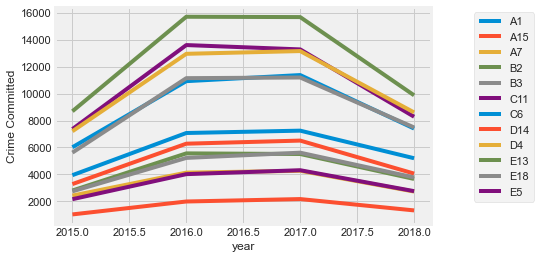

In [61]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

crime_year = crime.groupby(['YEAR','DISTRICT']).agg('count')[['INCIDENT_NUMBER']].reset_index()

crime_year = crime_year.rename(columns={"INCIDENT_NUMBER": "n_crime",
                                       "YEAR":"year",
                                       "DISTRICT":"district"})

pivot_crime_year = crime_year.pivot_table(values = 'n_crime',
                       index = 'year',
                      columns = 'district',
                     fill_value = 0)

# crime_year.plot.scatter('year', 'n_crime', c = 'district')
# crime_year.plot('year', 'n_crime')

crime_year_plot = pivot_crime_year.plot()

crime_year_plot.set_ylabel('Crime Committed')
crime_year_plot.legend(bbox_to_anchor=(1.1, 1))

#### 2. Is there relationship between time of day and drug crime (Linda)

We can do a bootstrap to see if the correlation between the number of incidences and time of the hour/month are statistically significant or not. *See Lab 07.*

**Null Hypothesis**: There is no significant different in incident count at different times.

**Alternative Hypothesis** Midnight/summer are when you would see more crime.

Use bootstrapping.

In [3]:
crime.groupby('MONTH').agg('count')[['INCIDENT_NUMBER']]

,INCIDENT_NUMBER
MONTH,
1,23610
2,21653
3,24146
4,24086
5,26199
6,30568
7,34556
8,34823
9,26543


#### 3. Can we use a model to predict the probability of when crime will happen based on different parameters like time, area, type of crime? The results may help officers to do more patrol in specific areas at specific time. (Nicholas/Linda)

Use KFold Validation to see which parameters have predictive power. Lab 09.

In [4]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [ ]:
## Independent variable: District, year, time/month
## Dependent variable: Incident number

# __Timeline:__ (2 points) 

Sketch out a timeline for the work you will do each week to complete this project. Be realistic.



# __Teamwork:__ (3 points) 

Describe in detail how you will divide up the work between team members and what aspects of the project you will complete together as a team. Note that during the presentation session each member needs to be able to answer questions about all aspects of the work, regardless of whether they took the lead on that section or not.